In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = True
%load_ext kedro.extras.extensions.ipython

[11/13/25 18:11:51] WARNING  C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\extras\extens ]8;id=263522;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py\warnings.py]8;;\:]8;id=805979;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py#109\109]8;;\
                             ions\ipython.py:19: KedroDeprecationWarning:                                          
                             kedro.extras.extensions.ipython should be accessed only using the                     
                             alias kedro.ipython. The unaliased name will be removed in Kedro                      
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as: C:\dev\phd.                                  ]8;id=553095;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=935698;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\framework\sta ]8;id=395865;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py\warnings.py]8;;\:]8;id=190060;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py#109\109]8;;\
                             rtup.py:99: KedroDeprecationWarning: project_version in pyproject.toml                
                             is deprecated, use kedro_init_version instead                                         
                               warnings.warn(                                                                      
                                                                                                                   

[11/13/25 18:11:52] WARNING  C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\io\partitione ]8;id=512508;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py\warnings.py]8;;\:]8;id=438858;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py#109\109]8;;\
                             d_dataset.py:200: KedroDeprecationWarning: 'PartitionedDataset' has                   
                             been moved to `kedro-datasets` and will be removed in Kedro 0.19.0.                   
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\io\partitione ]8;id=951550;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py\warnings.py]8;;\:]8;id=793620;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py#109\109]8;;\
                             d_dataset.py:200: KedroDeprecationWarning: 'PartitionedDataset' has                   
                             been moved to `kedro-datasets` and will be removed in Kedro 0.19.0.                   
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project phd                                                      ]8;id=955486;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=28826;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=108648;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=518621;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [83]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
import numpy as np
import yaml

from vessel_manoeuvring_models.visualization.plot import track_plot, plot
from phd.visualization.plot_ship import track_plots
from sklearn.metrics import mean_squared_error
import sympy as sp
from functools import reduce
from operator import add
from vessel_manoeuvring_models.symbols import *
import vessel_manoeuvring_models.symbols as symbols
from IPython.display import display
from vessel_manoeuvring_models.prime_system import df_prime
from vessel_manoeuvring_models.substitute_dynamic_symbols import run, lambdify, get_function_subs
from phd.helpers import mean
from vessel_manoeuvring_models.angles import mean_angle
from vessel_manoeuvring_models.angles import smallest_signed_angle
import inspect
from phd.visualization.plot_prediction import plot_total_force, plot_force_components
from vessel_manoeuvring_models.models.modular_simulator import ModularVesselSimulator, function_eq, subs_simpler
from scipy.optimize import least_squares
from vessel_manoeuvring_models.models.diff_eq_to_matrix import DiffEqToMatrix
from vessel_manoeuvring_models.prime_system import PrimeSystem, df_prime, prime_eq_to_SI_eq
import statsmodels.api as sm
import logging
log = logging.getLogger(__name__)

import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (12,10)

import seaborn as sns
from phd.visualization.maps import plot_map, plot_trips, plot_missions
from phd.helpers import derivative
from vessel_manoeuvring_models.data.lowpass_filter import lowpass_filter
from vessel_manoeuvring_models.KF_multiple_sensors import KalmanFilter
from vessel_manoeuvring_models.prime_system import get_denominator
from vessel_manoeuvring_models.parameters import df_parameters
p = df_parameters['symbol']
from vessel_manoeuvring_models.substitute_dynamic_symbols import lambdify, run, expression_to_python_method, equation_to_python_method
from vessel_manoeuvring_models.models.modular_simulator import subs_simpler
from sympy.matrices.immutable import ImmutableDenseMatrix
from sympy import Eq
#from vessel_manoeuvring_models.EKF_multiple_sensors import ExtendedKalmanFilter, update_gradient
from vessel_manoeuvring_models.EKF_VMM_1d import ExtendedKalmanFilterVMMWithAccelerometer
from vessel_manoeuvring_models.models.IMO_simulations import zigzag
from phd.pipelines.load_7m.nodes import derived_channels
from vessel_manoeuvring_models.extended_kalman_filter import extended_kalman_filter, time_steps_to_df
from phd.paper.equation import to_latex
import phd.pipelines.load_wPCC.reference_frames as reference_frames
import phd.pipelines.load_wPCC.accelerometers6 as accelerometers6
from phd.pipelines.filter.nodes import lowpass
import sympy.physics.mechanics as me
from phd.paper.equation import eq_dottify
import sys
from pathlib import Path

# Add parent folder to Python path
sys.path.insert(0, str(Path.cwd().parent))

from load_data import load, filter, calculate_accelerometer_corrections, accelerometers_to_origo, calculated_accelerometer, plot_accelerations, plot_accelerometers, acc
from phd.pipelines.load_wPCC.reference_frames import *
from sympy import Eq
from sympy import Matrix, print_latex

In [3]:
reference_frames.eq_y2d_P

Eq(\ddot{y}_{P}, \dot{v} - g*sin(\phi)*cos(\theta) + x_P*(-\dot{q}*sin(\phi) + \dot{r}*cos(\phi)*cos(\theta) - p*q*cos(\phi) - p*r*sin(\phi)*cos(\theta) - q*r*sin(\theta)*cos(\phi)) - z_P*(\dot{p} - \dot{r}*sin(\theta) - q*r*cos(\theta)) - (p - r*sin(\theta))*(-x_P*(q*cos(\phi) + r*sin(\phi)*cos(\theta)) + y_P*(p - r*sin(\theta))) + (-q*sin(\phi) + r*cos(\phi)*cos(\theta))*(u - y_P*(-q*sin(\phi) + r*cos(\phi)*cos(\theta)) + z_P*(q*cos(\phi) + r*sin(\phi)*cos(\theta))))

In [4]:
reference_frames.eq_y2d_P_simplified

Eq(\ddot{y}_{P}, \dot{r}*x_P*cos(\phi)*cos(\theta) + \dot{r}*z_P*sin(\theta) + \dot{v} - g*sin(\phi)*cos(\theta) + r*(-r*x_P*sin(\phi)*cos(\theta) - r*y_P*sin(\theta))*sin(\theta) + r*(-r*y_P*cos(\phi)*cos(\theta) + r*z_P*sin(\phi)*cos(\theta) + u)*cos(\phi)*cos(\theta))

In [5]:
reference_frames.expression_simplified.subs([
    (phi_,0),
    (theta_,0),

])


Matrix([
[-\dot{r}*y_P + \dot{u} - r*(r*x_P + v)],
[\dot{r}*x_P + \dot{v} + r*(-r*y_P + u)],
[                                     0]])

## Linearized equations

In [86]:
x2d_0,y2d_0,z2d_0 = symbols(r"\ddot{x}_{0},\ddot{y}_{0},\ddot{z}_{0}")

eq_z2d_P = Eq(z2d_P, z2d_0 - x_P*q1d + y_P*p1d)

In [87]:
eq_z2d_P

Eq(\ddot{z}_{P}, \ddot{z}_{0} + \dot{p}*y_P - \dot{q}*x_P)

In [88]:
print_latex(eq_z2d_P)

\ddot{z}_{P} = \ddot{z}_{0} + \dot{p} y_{P} - \dot{q} x_{P}


In [8]:
subs={
    u1d:'u1d',
    v1d:'v1d',
    r1d:'r1d',
    p1d:'p1d',
    q1d:'q1d',
    phi_:"phi",
    theta_:"theta", 
    z2d_0:"z2d_0",  
    z2d_P:"z2d_P",
}

In [9]:
eq_z2d_P.rhs.subs(subs)

p1d*y_P - q1d*x_P + z2d_0

In [10]:
lambda_z2d_P = expression_to_python_method(eq_z2d_P.rhs.subs(subs), function_name='z2d_P')


In [54]:
data = pd.read_csv("data.csv", index_col=0)
data = data.loc[0:200].copy()
columns_radians = ['Roll','Pitch','Yaw', 'Roll_V','Pitch_V','Yaw_V', 'Roll_A','Pitch_A','Yaw_A',]
for column in columns_radians:
    data[column] = np.deg2rad(data[column])

data['p1d'] = data['Roll_A']
data['q1d'] = data['Pitch_A']
data['r1d'] = data['Yaw_A']
data['z2d_0'] = data['Heave_A']
data['z2d_P'] = data['Acc1Z-D']

In [55]:
data.head()

,Surge,Sway,Heave,Roll,Pitch,Yaw,Acc1X-M,Acc1Y-M,Acc1Z-M,Acc1X-D,Acc1Y-D,Acc1Z-D,Surge_V,Sway_V,Heave_V,Roll_V,Pitch_V,Yaw_V,Surge_A,Sway_A,Heave_A,Roll_A,Pitch_A,Yaw_A,p1d,q1d,r1d,z2d_0,z2d_P
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.230434,-0.001176,-0.015056,-0.068615,-0.036187,0.006825,0.000380,-0.047018,0.901808,0.028819,-0.135930,-0.329303,0.056230,-0.010592,-0.060065,-0.385160,-0.006763,0.002835,0.001683,-0.064515,0.038305,-0.023738,0.008696,-0.000556,0.000397,0.008696,-0.000556,0.000397,-0.023738,0.056230
0.307246,-0.002182,-0.019515,-0.098272,-0.036674,0.007041,0.000511,-0.044259,0.881343,0.039832,-0.156437,-0.320441,0.076899,-0.016237,-0.057794,-0.387202,-0.006197,0.002785,0.001718,-0.081444,0.035148,-0.029234,0.008601,-0.000738,0.000509,0.008601,-0.000738,0.000509,-0.029234,0.076899
0.384057,-0.003670,-0.023934,-0.128098,-0.037139,0.007253,0.000644,-0.040808,0.857743,0.051126,-0.136649,-0.329364,0.097988,-0.023104,-0.054666,-0.389651,-0.005441,0.002721,0.001761,-0.058151,0.040067,-0.033751,0.011457,-0.000916,0.000603,0.011457,-0.000916,0.000603,-0.033751,0.097988
0.460868,-0.005731,-0.027912,-0.158132,-0.037509,0.007459,0.000781,-0.036734,0.831910,0.062509,-0.068642,-0.341287,0.120712,-0.025170,-0.051639,-0.392387,-0.004437,0.002644,0.001810,0.013261,0.018346,-0.035806,0.011140,-0.001088,0.000679,0.011140,-0.001088,0.000679,-0.035806,0.120712
0.537680,-0.007537,-0.031867,-0.188378,-0.037821,0.007659,0.000922,-0.032179,0.805205,0.073733,-0.023288,-0.345568,0.144434,-0.021066,-0.051847,-0.395152,-0.003730,0.002554,0.001865,0.061895,-0.000435,-0.035722,0.009934,-0.001252,0.000734,0.009934,-0.001252,0.000734,-0.035722,0.144434


In [56]:
eq = eq_z2d_P.subs(subs)
eq

Eq(z2d_P, p1d*y_P - q1d*x_P + z2d_0)

In [57]:
z = sp.symbols('z')

In [58]:
eq_regression = Eq(z,eq.rhs-sp.symbols('z2d_0'))
eq_regression

Eq(z, p1d*y_P - q1d*x_P)

In [59]:
data['z'] = data['z2d_P'] - data['z2d_0']

In [60]:
eq_to_matrix = DiffEqToMatrix(eq_regression, label=z, base_features=sp.symbols('p1d,q1d'))

In [61]:
model = eq_to_matrix.fit(data=data, y=data['z'] )

In [62]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 1.000       
Dependent Variable:     z                AIC:                         -101302.8152
Date:                   2025-11-13 18:25 BIC:                         -101291.0879
No. Observations:       2601             Log-Likelihood:              50653.      
Df Model:               2                F-statistic:                 5.773e+20   
Df Residuals:           2599             Prob (F-statistic):          0.00        
R-squared (uncentered): 1.000            Scale:                       7.1194e-19  
------------------------------------------------------------------------------------
             Coef.     Std.Err.           t           P>|t|      [0.025      0.975] 
------------------------------------------------------------------------------------
y_P           0.0000     0.0000              0.2650   0.7910     -0.0000      0.0000
-x_P       -143.8418     0.0000   -31782329281.6016   0.0000   -143.8418   -143.8418
----------------------------------------------------------------------------------
Omnibus:                    189.645            Durbin-Watson:               1.995 
Prob(Omnibus):              0.000              Jarque-Bera (JB):            64.670
Skew:                       -0.024             Prob(JB):                    0.000 
Kurtosis:                   2.229              Condition No.:               2     
==================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the                 model
does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [67]:
params = model.params.copy()
params['x_P'] = -params['-x_P']

In [70]:
df_prediction = data.copy()
df_prediction['z2d_P'] = lambda_z2d_P(**data, **params)

<Axes: xlabel='Time'>

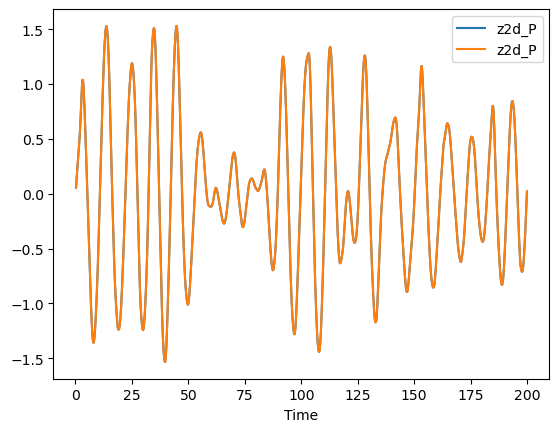

In [71]:
fig,ax=plt.subplots()
data.plot(y='z2d_P', ax=ax)
df_prediction.plot(y='z2d_P', ax=ax)

In [74]:
data2 = data.copy()
data2['z2d_P'] = data2['Acc1Z-M']
data2['z'] = data2['z2d_P'] - data2['z2d_0']

In [75]:
model2 = eq_to_matrix.fit(data=data2, y=data2['z'] )

In [79]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.788     
Dependent Variable:     z                AIC:                         -2962.9245
Date:                   2025-11-13 18:34 BIC:                         -2951.1972
No. Observations:       2601             Log-Likelihood:              1483.5    
Df Model:               2                F-statistic:                 4830.     
Df Residuals:           2599             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.788            Scale:                       0.018727  
------------------------------------------------------------------------------------
              Coef.       Std.Err.        t         P>|t|       [0.025       0.975] 
------------------------------------------------------------------------------------
y_P            3.1035       0.5610       5.5322     0.0000       2.0035       4.2035
-x_P         -65.9402       0.7340     -89.8341     0.0000     -67.3795     -64.5009
--------------------------------------------------------------------------------
Omnibus:                   32.362            Durbin-Watson:               0.005 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            20.229
Skew:                      -0.035            Prob(JB):                    0.000 
Kurtosis:                  2.574             Condition No.:               2     
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [76]:
params2 = model2.params.copy()
params2['x_P'] = -params2['-x_P']

In [77]:
df_prediction2 = data2.copy()
df_prediction2['z2d_P'] = lambda_z2d_P(**data2, **params2)

<Axes: xlabel='Time'>

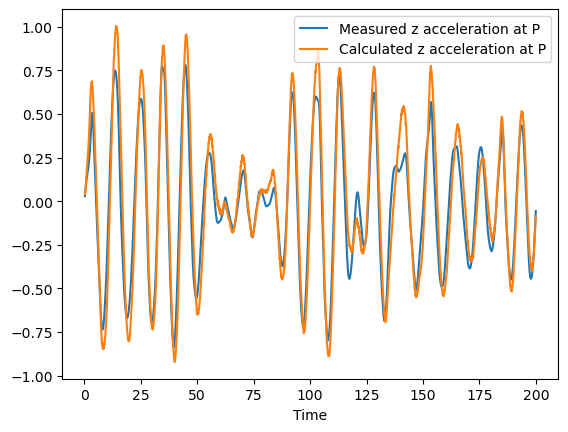

In [80]:
fig,ax=plt.subplots()
data2.plot(y='z2d_P', label='Measured z acceleration at P', ax=ax)
df_prediction2.plot(y='z2d_P', label='Calculated z acceleration at P', ax=ax)